In [1]:
using StatsBase, Distributions, DataFrames, PyPlot, LinearAlgebra, Statistics, Seaborn, Random,  LaTeXStrings, Pkg, Clustering

In [4]:
##1,2.8, 5
Random.seed!(456)
θ1= rand(Uniform(0,2π),150)
x11 = cos.(θ1) .+ rand(Normal(0,0.25),150)
x12 = sin.(θ1) .+ rand(Normal(0,0.25),150)
θ2= rand(Uniform(0,2π),150)
x21 = 2.8 .*cos.(θ2) .+ rand(Normal(0,0.25),150)
x22 = 2.8 .*sin.(θ2) .+ rand(Normal(0,0.25),150)
θ3= rand(Uniform(0,2π),150)
x31 = 5 .*cos.(θ3) .+ rand(Normal(0,0.25),150)
x32 = 5 .*sin.(θ3) .+ rand(Normal(0,0.25),150);

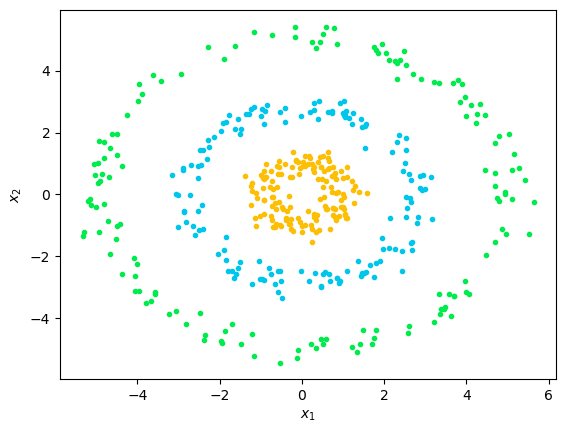

In [5]:
scatter(x31,x32,marker = ".",color = "#00EB4D")
scatter(x21,x22,marker = ".",color = "#00C6EB")
scatter(x11,x12,marker = ".",color = "#FCBF04")
xlabel(L"x_1")
ylabel(L"x_2");

In [6]:
β = 0.5
M =zeros(450,450)
x = vcat(x11,x21,x31)
y = vcat(x12,x22,x32)

for i ∈ 1:1:450
    for j ∈ i:1:450
        M[i,j] = exp(-β*((x[i] - x[j])^2 + (y[i] - y[j])^2))
        M[j,i] = M[i,j]     
    end
end

In [7]:
W = zeros(450,450)
x = vcat(x11,x21,x31)
y = vcat(x12,x22,x32)
k = 10

for i ∈ 1:1:450
    ind1 = findall((M[i,:] .>= sort(M[i,:],rev=true)[(k+1)]))
    ind1 = ind1[findall(ind1 .!= i)]
    W[i,ind1]= M[i,ind1]
    ind2 =[]
    for j ∈ 1:1:450
        ind = findall((M[j,:] .>= sort(M[j,:],rev=true)[(k+1)]))
        ind = ind[findall(ind .!= j)]
        if i ∈ ind
            ind2 = vcat(ind2,j)
        end
    end
    if ind2 != []
        W[i,ind2]= M[i,ind2]
    end
end

In [8]:
d = zeros(450)
for i ∈ 1:1:450
    d[i] =sum(W[i,:])
end
D = Diagonal(d)
##Laplaciano 
L = D - W
L = Symmetric(L);

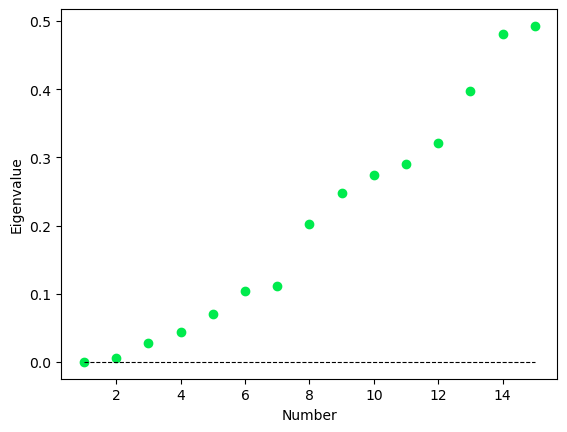

In [9]:
scatter(1:1:15,eigvals(L)[1:15], color = "#00EB4D")
hlines(0,1,15,color = "black",linestyle = "dashed"
       ,linewidth = 0.8)
xlabel("Number")
ylabel("Eigenvalue");

In [10]:
##Eigenvectors 
e2 = eigvecs(L)[:,2]
e3 = eigvecs(L)[:,3];

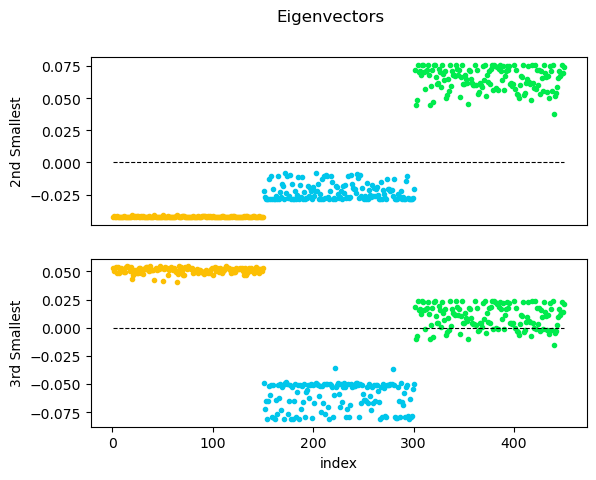

In [11]:
fig = figure(figsize = (5,1))
fig,(ax1,ax2) = plt.subplots(2)
fig.suptitle("Eigenvectors")
ax1.scatter(301:1:450,e2[301:450],marker = ".",color="#00EB4D")
ax1.scatter(151:1:300,e2[151:300],marker = ".",color="#00C6EB")
ax1.scatter(1:1:150,e2[1:150],marker = ".",color="#FCBF04")
ax1.hlines(0,1,450,color = "black",linestyle = "dashed"
       ,linewidth = 0.8)
ax1.set_ylabel("2nd Smallest")
ax1.get_xaxis().set_visible(false)
ax2.scatter(301:1:450,e3[301:450],marker = ".",color="#00EB4D")
ax2.scatter(151:1:300,e3[151:300],marker = ".",color="#00C6EB")
ax2.scatter(1:1:150,e3[1:150],marker = ".",color="#FCBF04")
ax2.hlines(0,1,450,color = "black",linestyle = "dashed"
       ,linewidth = 0.8)
ax2.set_ylabel("3rd Smallest")
ax2.set_xlabel("index");

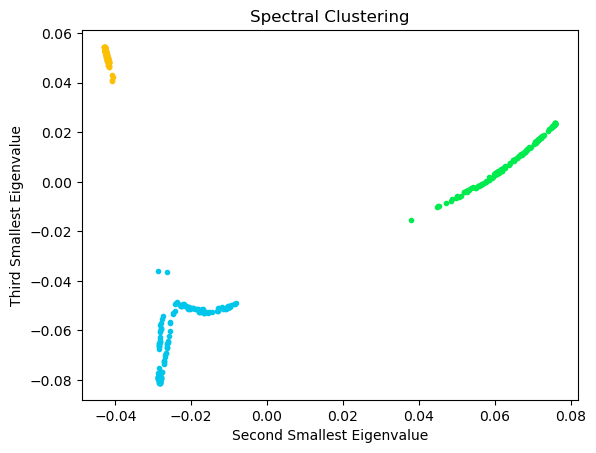

In [12]:
##Resultado espectral clustering
scatter(e2[301:450],e3[301:450],marker = ".",color="#00EB4D")
scatter(e2[151:300],e3[151:300],marker = ".",color="#00C6EB")
scatter(e2[1:150],e3[1:150],marker = ".",color="#FCBF04")
title("Spectral Clustering")
xlabel("Second Smallest Eigenvalue")
ylabel("Third Smallest Eigenvalue");

In [15]:
Y = hcat(e2,e3);

In [26]:
kk= kmeans(Y',3)
clus = assignments(kk)
G1 = Y[findall(clus .== 3),:] 
G2 = Y[findall(clus .== 2),:] 
G3 = Y[findall(clus .== 1),:] 

150×2 Matrix{Float64}:
 -0.0426967  0.0530574
 -0.042046   0.0500462
 -0.042656   0.0527221
 -0.0427654  0.0535877
 -0.0417275  0.0482636
 -0.0427783  0.0538714
 -0.0421052  0.0489877
 -0.0424399  0.0512293
 -0.0426789  0.0530056
 -0.0422881  0.0501754
 -0.0426023  0.0523892
 -0.0420136  0.0498726
 -0.0421508  0.0493219
  ⋮          
 -0.0424654  0.0521939
 -0.042095   0.0502762
 -0.042081   0.0488386
 -0.0424638  0.0514213
 -0.0427637  0.0536307
 -0.042627   0.0529367
 -0.0421596  0.0493666
 -0.0418407  0.0489179
 -0.0426041  0.0525007
 -0.0425661  0.0520996
 -0.0422472  0.0499142
 -0.0426856  0.0529646

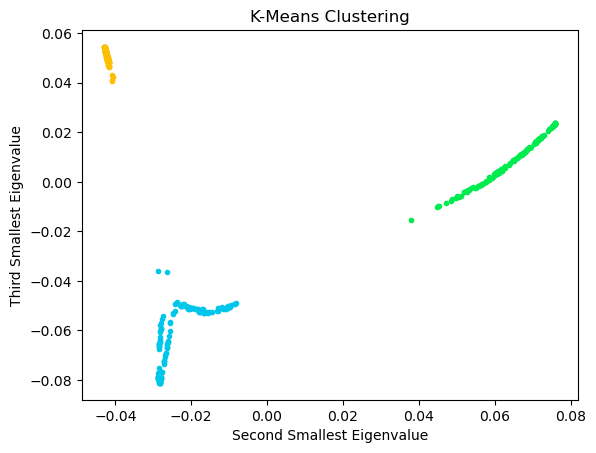

In [30]:
scatter(G1[:,1],G1[:,2],marker = ".",color="#00C6EB")
scatter(G2[:,1],G2[:,2],marker = ".",color="#00EB4D")
scatter(G3[:,1],G3[:,2],marker = ".",color="#FCBF04")
title("K-Means Clustering")
xlabel("Second Smallest Eigenvalue")
ylabel("Third Smallest Eigenvalue");